# **Problem Statement**

The SaaS company is a company that is selling sales and marketing software to other companies (B2B). They have collected transactions data from their costumer. They hire a data scientist to anlayze the dataset so that they can gain more insight and improve company future perfomance.

The specific insight they required is as follows:
- 1. They need to select 5 products with the highest margin to prioritize their resources allocation in R&D.
- 2. They need to select 3 industries with the highest profit to prioritize which industries they should focus on.
- 3. They need to know 5 countries with the highest sales to expand their team and networking in the area.
- 4. They need to know each quarter Profit as to help them when to allocate their resources.
- 5. They want to know the correlation between sales and discount to measure the effectiveness of the discount given.
- 6. They want to know the independency between 5 countries with the highest sales (Insight 3) and 3 industries with the highest profit (Insight 2) using Chi-Squared Test to decide whether those 3 industries should be prioritized or not in those 5 countries.

# **Data Understanding**


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from geopy.geocoders import Nominatim
import folium
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

In [2]:
# Read data(csv) and make into dataframe
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


This dataset contains transaction data from SaaS company selling sales and marketing
software to other companies (B2B). In the dataset, each row represents a single transaction/order
(9,994 transactions), and the columns include:
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

# **Data Preprocesing**

## Data Preprocesing - Data Type

In [3]:
# Getting Data Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
# - Some columns has inappropriate data type, these columns need their type to be change as follows:
#   -   Row ID      : int64     -> object
#   -   Order Date  : object    -> datetime64[ns]
#   -   Customer ID : int64     -> object
df[['Row ID','Customer ID']] = df[['Row ID','Customer ID']].astype('object')
df[['Order Date']] = df[['Order Date']].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

Data type has been changed

## Data Preprocesing - Mischaracterization

In [5]:
# Checking any mischaracterization in Country
np.sort(df['Country'].unique())


array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Taiwan',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

There is not any mischaracterization in Country

In [6]:
# Checking any mischaracterization in Industry
np.sort(df['Industry'].unique())

array(['Communications', 'Consumer Products', 'Energy', 'Finance',
       'Healthcare', 'Manufacturing', 'Misc', 'Retail', 'Tech',
       'Transportation'], dtype=object)

There is not any mischaracterization in Industry

In [7]:
# Checking any mischaracterization in Segment
np.sort(df['Segment'].unique())

array(['Enterprise', 'SMB', 'Strategic'], dtype=object)

There is not any mischaracterization in Segment

In [8]:
# Checking any mischaracterization in Product
np.sort(df['Product'].unique())

array(['Alchemy', 'Big Ol Database', 'ChatBot Plugin', 'ContactMatcher',
       'Data Smasher', 'FinanceHub', 'Marketing Suite',
       'Marketing Suite - Gold', 'OneView', 'SaaS Connector Pack',
       'SaaS Connector Pack - Gold', 'Site Analytics', 'Storage',
       'Support'], dtype=object)

There is not any mischaracterization in Product

## Data Preprocesing - Out of Range Values

In [9]:
# Checking whether there is any negative sales
print(f"Lowest Sales = {df['Sales'].min()}")

Lowest Sales = 0.444


There is not any negative sales

In [10]:
# Checking whether there is any negative or zero quantity
print(f"Lowest Quantity = {df['Quantity'].min()}")

Lowest Quantity = 1


There is neither any negative nor any zero quantity

In [11]:
# Checking whether the discount range is correct
print(f"Lowest discount = {df['Discount'].min()}\nHighest discount = {df['Discount'].max()}")

Lowest discount = 0.0
Highest discount = 0.8


The discount range is still correct (between: 0 - 1)

## Data Preprocesing - Missing Values

In [12]:
# Checking any Missing Values
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is not any missing values, therefore no action is required to fill the missing values or remove any rows that has missing values

## Data Preprocesing - Duplicate Data

In [13]:
# Checking any duplicate data
df.duplicated().sum()

0

There is not any duplicate data, therefore no action is required to remove duplicate data

In [14]:
# Checking any duplicate data (while exclude Row ID as consideration to make sure there is not any duplicate data with different Row ID)
df.duplicated(subset=[col for col in df.columns if col not in ['Row ID']]).sum()

0

There is not any duplicate data, therefore no action is required to remove duplicate data.

# **Data analysis, Visualization, Insight and Recommendation**

## A. 5 Products with the highest margin

In [15]:
# Create df1 by sum all Profit and Sales for each Product
df1 = df.groupby('Product')[['Profit','Sales']].sum()
df1.head()

,Profit,Sales
Product,,
Alchemy,55617.8249,149528.030
Big Ol Database,3384.7569,189238.631
ChatBot Plugin,6527.7870,27118.792
ContactMatcher,12496.2822,410378.265
Data Smasher,41936.6357,167380.318


In [16]:
# Calculate margin in percentage (Profit-Sales)*100, round to 0 decimals then change to integer to eliminate decimals completely
df1['Margin (%)']=round(df1['Profit']/df1['Sales']*100).apply(lambda x: int(x))
df1.head()

,Profit,Sales,Margin (%)
Product,,,
Alchemy,55617.8249,149528.030,37
Big Ol Database,3384.7569,189238.631,2
ChatBot Plugin,6527.7870,27118.792,24
ContactMatcher,12496.2822,410378.265,3
Data Smasher,41936.6357,167380.318,25


In [17]:
# Sort df1 by 5 highest margin, then reset index so that product became new column instead of index before
df1 = df1.sort_values(by='Margin (%)', ascending=False).head().reset_index()
df1

,Product,Profit,Sales,Margin (%)
0,SaaS Connector Pack - Gold,6964.1767,16476.402,42
1,Alchemy,55617.8249,149528.030,37
2,Storage,949.5182,3024.280,31
3,Support,32864.4698,125152.744,26
4,Data Smasher,41936.6357,167380.318,25


### A. 5 Products with the highest margin (Visualization, Insight and Recommendation)

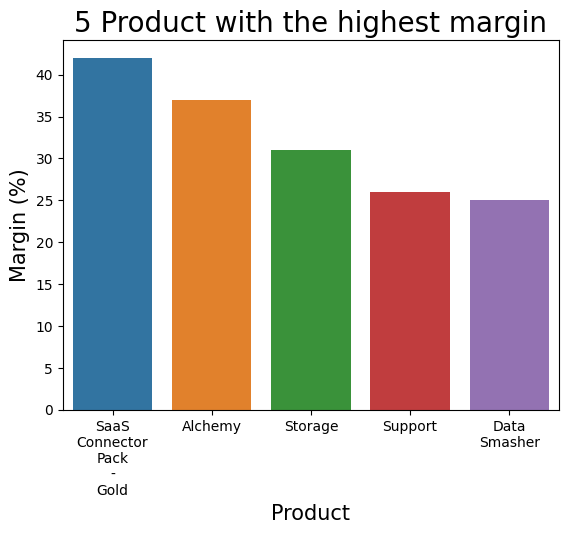

In [18]:
# Create Barplot using Product as x axis and Margin (%) as y axis from df1
sns.barplot(data=df1, x='Product', y='Margin (%)')
plt.xticks(ticks=range(len(df1['Product'])), labels=[label.replace(' ', '\n') for label in df1['Product']], fontsize=10)  # Adjust x-ticks labels to new rows every whitespace
plt.yticks(fontsize=10)
plt.xlabel(df1.columns[0], fontsize=15)
plt.ylabel(df1.columns[-1], fontsize=15)
plt.title('5 Product with the highest margin', fontsize=20)
plt.show()

**Insight 1: SaaS Connector Pack - Gold, Alchemy, Storage, Support, and Data Smasher are 5 products with the highest margin**<br>
**Recommendation: Allocate R&D Resources Strategically.**<br>
Since SaaS Connector Pack - Gold, Alchemy, Storage, Support, and Data Smasher are the top products with the highest margin, it's recommended to allocate more resources and focus on further improving and enhancing these products. Consider investing in R&D to add new features, enhance user experience and addressing any pain points reported by customers. This investment could result in even higher profitability and customer satisfaction. Additionally, analyze what specifically makes these products successful and try to incorporate similar elements into other products to optimize their margins as well.

## B. 3 Industries with the highest profit

In [19]:
# Create df2 by sum all Profit for each Industry, then round Profit into 2 decimals
df2 = df.groupby('Industry')[['Profit']].sum().apply(lambda x: round(x,2))
df2

,Profit
Industry,
Communications,13976.34
Consumer Products,37018.01
Energy,45282.31
Finance,50348.97
Healthcare,31969.09
Manufacturing,38413.11
Misc,7163.63
Retail,30207.82
Tech,24615.04


In [20]:
# Sort df2 by 3 highest Profit, then reset index so that Industry became new column instead of index before
df2 = df2.sort_values(by='Profit', ascending=False).head(3).reset_index()
df2

,Industry,Profit
0,Finance,50348.97
1,Energy,45282.31
2,Manufacturing,38413.11


### B. 3 Industries with the highest profit (Visualization, Insight and Recommendation)

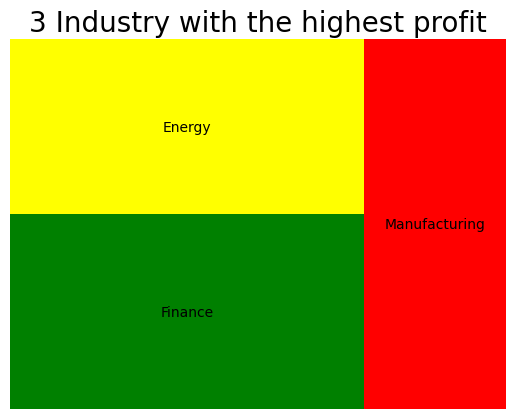

In [21]:
# Using squarify to make treemap from df2, Profit is used as treemap sizes and Industry is used as treemap label
squarify.plot(sizes=df2['Profit'], label=df2['Industry'], color=['Green','Yellow','Red'])
plt.title('3 Industry with the highest profit', fontsize=20)
plt.axis('off')  # remove axis
plt.show()


**Insight 2: Finance, Energy, and Manufacturing are 3 Industry with the highest Profit**<br>
**Recommendation: Tailoring your product offerings and marketing strategies to specifically target these industries.**<br>
The Finance, Energy, and Manufacturing industries are generating the highest profits. To capitalize on this insight, consider tailoring your product offerings and marketing strategies to specifically target these industries. Develop specialized solutions that address the unique needs and challenges of each industry. This will help you maintain a strong presence and attract more customers within these high-profit sectors.

## C. 5 Countries with the highest sales


In [22]:
# Create df3 by sum Sales for each Country, then round Sales into 2 decimals
df3 = df.groupby('Country')[['Sales']].sum().apply(lambda x: round(x,2))
df3.head()

,Sales
Country,
Argentina,35764.31
Australia,80166.10
Austria,2865.02
Belgium,17431.15
Brazil,76269.61


In [23]:
# Sort df3 by 5 highest Sales, then reset index so that Country became new column instead of index before
df3 = df3.sort_values(by='Sales', ascending=False).head().reset_index()
df3

,Country,Sales
0,United States,457687.63
1,United Kingdom,313169.88
2,Japan,170188.05
3,Canada,138641.27
4,France,116511.91


### C. 5 Countries with the highest sales (Visualization, Insight and Recommendation)


In [24]:
# Create function to get latitude and longitude by inputing Country
def get_country_coordinates(country_name):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.geocode(country_name, exactly_one=True)
    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None, None

# Add latitude and longitude columns to df3 by appending list with function result
latitude=[]
longitude=[]
for i in df3['Country']:
    lat, long = get_country_coordinates(i)
    latitude.append(lat)
    longitude.append(long)
df3['Latitude']=latitude
df3['Longitude']=longitude
df3


,Country,Sales,Latitude,Longitude
0,United States,457687.63,39.783730,-100.445882
1,United Kingdom,313169.88,54.702354,-3.276575
2,Japan,170188.05,36.574844,139.239418
3,Canada,138641.27,61.066692,-107.991707
4,France,116511.91,46.603354,1.888334


In [25]:
# Create folium map using latitude and longitude in the center of world map, then inputing df3 data for each country marker.
world_map = folium.Map(location=[29.6166068,7.8992381], zoom_start=2)
for i in df3.index:
    country_marker = folium.Marker(location = [df3['Latitude'][i],df3['Longitude'][i]],
                                tooltip = df3['Country'][i], 
                                popup = f"Sales\n{df3['Sales'][i]}", 
                                icon= folium.Icon(icon='flag'))
    country_marker.add_to(world_map)

world_map


**Insight 3: United States, United Kingdom, Japan, Canada, and France are 5 Country with the highest Sales**<br>
**Recommendation: Expand Sales Team and Network in Top Countries.**<br>
United States, United Kingdom, Japan, Canada, and France are the countries with the highest sales. To expand your team and networking in these regions, you should consider establishing local sales and support teams in each of these countries. Building relationships with local businesses and attending industry events will help you further penetrate these markets and capitalize on the strong sales potential.

## D. Each quarter Profit

In [26]:
# Create df4 by sum Profit for each date
df4 = df.pivot_table(values='Profit',index='Order Date',aggfunc=np.sum)
df4.head()

,Profit
Order Date,
2020-01-04,5.5512
2020-01-05,-65.9901
2020-01-06,4.8840
2020-01-07,1358.0524
2020-01-08,-71.9621


In [27]:
# Sum Profit for each quarter using .resample('Q').sum, then reset index so that Order Date became new column instead of index before
df4 = df4.resample('Q').sum().reset_index()
df4['Profit'] = df4['Profit'].apply(lambda x: round(x,2))       # Round Profit into 2 decimals
df4

,Order Date,Profit
0,2020-03-31,3811.23
1,2020-06-30,11204.07
2,2020-09-30,12804.72
3,2020-12-31,21723.95
4,2021-03-31,9264.94
5,2021-06-30,12190.92
6,2021-09-30,16853.62
7,2021-12-31,23309.12
8,2022-03-31,11446.34
9,2022-06-30,16084.91


### D. Each quarter Profit (Visualization, Insight and Recommendation)

In [28]:
# Create list for xticks by change YYYY-MM-DD to Q\nYYYY
date_ranges = []
start_date = df4['Order Date'].min()
end_date = df4['Order Date'].max()
while start_date <= end_date:
    formatted_date_range = f"Q{start_date.quarter}\n{start_date.year}"
    date_ranges.append(formatted_date_range)
    start_date = start_date + pd.DateOffset(months=3)
date_ranges

['Q1\n2020',
 'Q2\n2020',
 'Q3\n2020',
 'Q4\n2020',
 'Q1\n2021',
 'Q2\n2021',
 'Q3\n2021',
 'Q4\n2021',
 'Q1\n2022',
 'Q2\n2022',
 'Q3\n2022',
 'Q4\n2022',
 'Q1\n2023',
 'Q2\n2023',
 'Q3\n2023',
 'Q4\n2023']

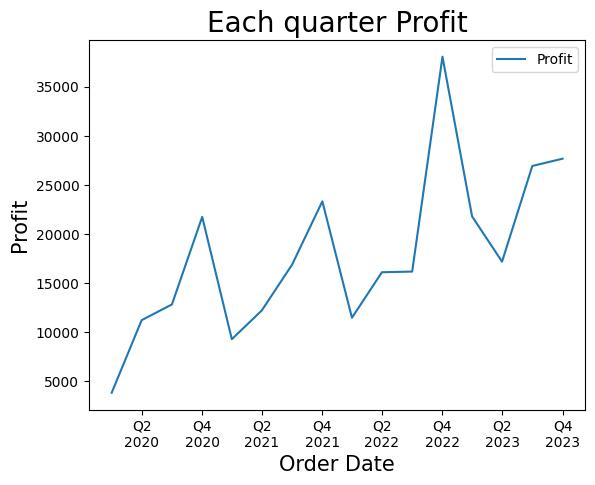

In [29]:
# Create lineplot from df4 using Order Date as x-axis and Profit as y-axis
sns.lineplot(data=df4, x='Order Date', y='Profit', label='Profit')
plt.xticks(df4['Order Date'][1::2],date_ranges[1::2], fontsize=10)      # Make xticks only shows Q2 and Q4 in each year
plt.yticks(fontsize=10)
plt.xlabel(df4.columns[0], fontsize=15)
plt.ylabel(df4.columns[-1], fontsize=15)
plt.title('Each quarter Profit', fontsize=20)
plt.show()

**Insight 4: Fourth quarter always generate the highest profit while first quarter usually generate the lowest profit**<br>
**Recommendation: Resource Allocation based on Quarterly Insights.**<br>
Understanding the quarterly profit patterns is crucial for resource allocation. Since the fourth quarter consistently generates the highest profit and the first quarter tends to have the lowest, allocate additional resources and marketing efforts leading up to the fourth quarter. Plan promotions, product launches, and sales campaigns during this time to maximize profit and offset any potential dips in the first quarter.

## E. Correlation between Sales and Discount

In [30]:
# Create df5 from Sales and Discount
df5 = df[['Sales','Discount']]
df5.head()

,Sales,Discount
0,261.9600,0.00
1,731.9400,0.00
2,14.6200,0.00
3,957.5775,0.45
4,22.3680,0.20


In [31]:
# Test for normality using shapiro wilk test on Sales and Discount with significance level alpha(0.05)
alpha = 0.05
for i in df5.columns:
    sh = shapiro(df5[i])
    if sh[1] > alpha:
        print(f'{i}, Shapiro Wilk Test Result:')
        print(f"pvalue = {sh[1]} is greater than alpha({alpha}).\nSample looks Gaussian (fail to reject Ho), therefore {i} is normally distributed.\n")
    else:
        print(f'{i}, Shapiro Wilk Test Result:')
        print(f"pvalue = {sh[1]} is less or equal than alpha({alpha}).\nSample does not look Gaussian (reject Ho), therefore {i} is not normally distributed.\n")

Sales, Shapiro Wilk Test Result:
pvalue = 0.0 is less or equal than alpha(0.05).
Sample does not look Gaussian (reject Ho), therefore Sales is not normally distributed.

Discount, Shapiro Wilk Test Result:
pvalue = 0.0 is less or equal than alpha(0.05).
Sample does not look Gaussian (reject Ho), therefore Discount is not normally distributed.



c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


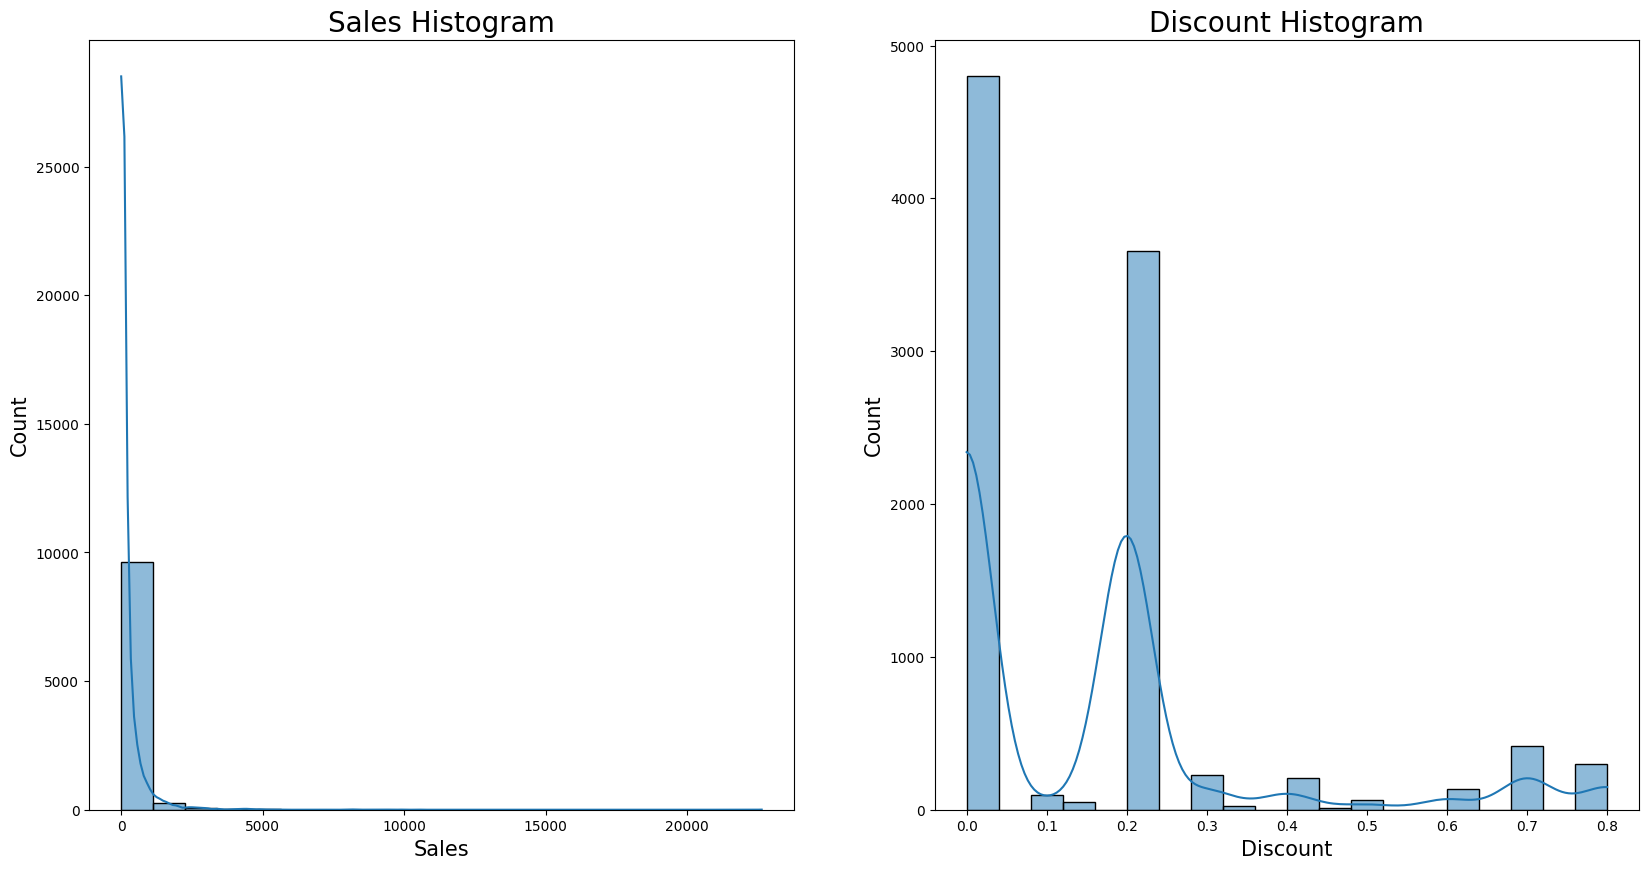

In [32]:
# Test for normality by create Sales and Discount histogram
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(df5['Sales'], bins=20, kde=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Sales Histogram', fontsize=20)

plt.subplot(1,2,2)
sns.histplot(df5['Discount'], bins=20, kde=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Discount', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Discount Histogram', fontsize=20)

plt.show()

After using shaphiro wilk test and make histogram for Sales and Discount,<br>
it is concluded that both Sales and Discount are not normally distributed.

In [33]:
# Using Spearman Correlation instead of Pearson Correlation on df5 because Sales or Discount are not normally distributed.
df5 = df5.corr(method='spearman').apply(lambda x: round(x,2))           # Round correlation values into 2 decimals
df5

,Sales,Discount
Sales,1.00,-0.06
Discount,-0.06,1.00


### E. Correlation between Sales and Discount (Visualization, Insight and Recommendation)

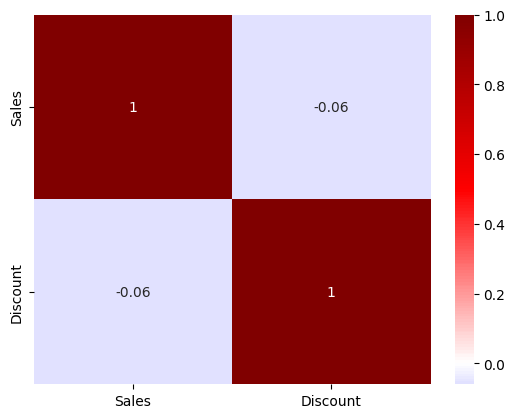

In [34]:
# Create heatmap for the correlation
sns.heatmap(df5, annot=True, cmap='seismic', center=0)
plt.show()

**Insight 5: Sales and Discount has weak negative relations**<br>
**Recommendation: Analyze Discount Strategy Effectiveness.**<br>
Given the weak negative correlation between sales and discounts, it's important to carefully evaluate your discount strategy. Consider conducting further testing to measure the impact of different discount on sales. Monitor customer behavior and purchasing patterns closely during discount periods. Adjust your discount strategy based on the insights gained to strike the right balance between boosting sales and maintaining healthy profit margins.

## F. Chi-Squared Test for Independence<br>between 5 Countries with the highest sales<br>and 3 Industries with the highest profit

From insight 3, the 5 Country with the highest Sales are United States, United Kingdom, Japan, Canada, France.<br>
From insight 2, the 3 Industry with the highest Profit are Finance, Energy, Manufacturing.

In [35]:
# Create df6 by only include Countries and Industries stated before
countries6 = ['United States', 'United Kingdom', 'Japan', 'Canada', 'France']
industries6 = ['Finance', 'Energy', 'Manufacturing']
df6 = df[(df['Country'].isin(countries6)) & (df['Industry'].isin(industries6))]
df6.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714
5,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694
6,7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656
7,8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.152,6,0.2,90.7152
8,9,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.504,3,0.2,5.7825


In [36]:
# Filter df6 to only include Country and Industry columns,
# then create pivot table by count the occurrence between Country and Industry
df6_piv = df6[['Country','Industry']].pivot_table(index='Country', columns='Industry', aggfunc=len)
df6_piv

Industry,Energy,Finance,Manufacturing
Country,,,
Canada,69,129,57
France,45,121,94
Japan,167,207,103
United Kingdom,163,265,137
United States,245,416,226


Chi-Squared Test<br>

Hypothesis:
- Ho : The two variables are independent
- Ha : The two variables are dependent

In [37]:
# Using Chi-Squared Test between Country and Industry with significance level alpha(0.05)
alpha = 0.05
chi = chi2_contingency(df6_piv)
if chi[1] > alpha:
    print('Chi-Squared Test Result:')
    print(f"pvalue = {chi[1]} is greater than alpha({alpha}).\nAccept Ho (fail to reject Ho), therefore The two variables are independent.\n")
else:
    print('Chi-Squared Test Result:')
    print(f"pvalue = {chi[1]} is less or equal than alpha({alpha}).\nAccept Ha (reject Ho), therefore The two variables are dependent.\n")

Chi-Squared Test Result:
pvalue = 1.195563462735506e-05 is less or equal than alpha(0.05).
Accept Ha (reject Ho), therefore The two variables are dependent.



### F. Chi-Squared Test for Independence<br>between 5 Countries with the highest sales<br>and 3 Industries with the highest profit<br>(Visualization, Insight and Recommendation)

In [38]:
# Count the occurrence between Country and Industry
df6 = df6.groupby(['Country', 'Industry']).size().reset_index(name='Count')
df6

,Country,Industry,Count
0,Canada,Energy,69
1,Canada,Finance,129
2,Canada,Manufacturing,57
3,France,Energy,45
4,France,Finance,121
5,France,Manufacturing,94
6,Japan,Energy,167
7,Japan,Finance,207
8,Japan,Manufacturing,103
9,United Kingdom,Energy,163


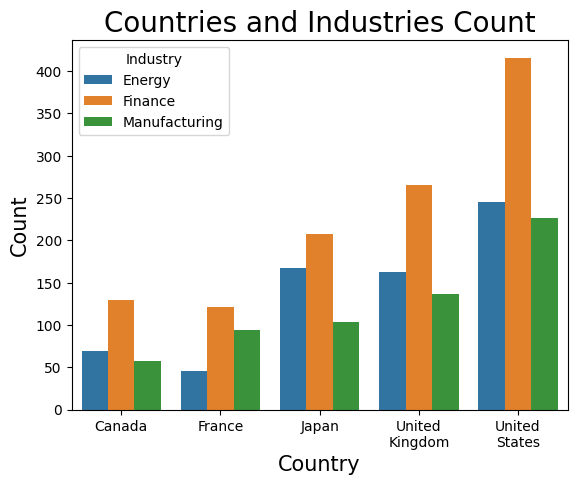

In [39]:
# Create Barplot using Country as x axis, Count as y axis and group by Industry from df6
sns.barplot(df6, x='Country', y='Count', hue='Industry')
plt.xticks(ticks=range(len((df6['Country'].unique()))), labels=[label.replace(' ', '\n') for label in df6['Country'].unique()], fontsize=10)  # Adjust x-ticks labels to new rows every whitespace
plt.yticks(fontsize=10)
plt.xlabel(df6.columns[0], fontsize=15)
plt.ylabel(df6.columns[-1], fontsize=15)
plt.title('Countries and Industries Count', fontsize=20)
plt.show()

From Chi-Squared Test before the result conclude that the two variables are dependent, this conclusion also supported by the barplot above as the occurrences between each unique Countries and Industries are not same, therefore:<br>

**Insight 6: Country and Industry are dependent**<br>
**Recommendation: Cross-Reference Country and Industry Strategies.**<br>
Since the analysis indicates dependency between the countries with the highest sales and the industries with the highest profit, prioritize aligning your product offerings with the needs of these industries within these countries. Tailor your marketing messages to highlight how your products can specifically benefit the targeted industries in each country. This alignment will likely result in higher customer engagement and conversion rates.

# Export Final DataFrame into Excel

In [40]:
# Export each final dataframes to excel sheets:
with pd.ExcelWriter('data_for_tableau.xlsx', engine='xlsxwriter') as excel_writer:      # Excel name: 'data_for_tableau.xlsx'
    for index, df in enumerate([df, df1, df2, df3, df4, df5, df6]):
        df.to_excel(excel_writer, sheet_name=f'df{index}', index=False)                  # Export dataframes to each excel sheets

print(f'DataFrames has been exported to excel')


DataFrames has been exported to excel
